In [103]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [328]:
ds = pd.read_csv('NYC_clean.csv')
ds = ds.drop('Unnamed: 0', axis = 1)
ds.head()

,Borough,Account Name,Meter Type,Funding Source,Bill Date,# days,Meter Number,Total Costs($),Rate Class,Bill Analyzed,Energy Consumption(KWh),Power Consumption(KW)
0,BRONX,ADAMS,NONE,FEDERAL,2010-01,33,7223256,15396.82,GOV/NYC/068,Yes,128800,216.0
1,BRONX,ADAMS,NONE,FEDERAL,2010-02,30,7223256,14556.34,GOV/NYC/068,Yes,115200,224.0
2,BRONX,ADAMS,NONE,FEDERAL,2010-03,29,7223256,13904.98,GOV/NYC/068,Yes,103200,216.0
3,BRONX,ADAMS,NONE,FEDERAL,2010-04,31,7223256,14764.04,GOV/NYC/068,Yes,105600,208.0
4,BRONX,ADAMS,NONE,FEDERAL,2010-05,28,7223256,13729.54,GOV/NYC/068,Yes,97600,216.0


# EDA

In [329]:
'''This dataset has FHA and Non development facility on borough column when they are not 
NYC boroughs. FHA are federal development housing admisnistration loans so they should not be 
in this column. Non development facility are non residential buildings developments which will also
not considered in the boroughs.'''

# dropping all Boroughs rows which are FHA and NON development

ds = ds.drop(ds[ds.Borough == 'FHA'].index)
ds = ds.drop(ds[ds.Borough == 'NON DEVELOPMENT FACILITY'].index)

In [330]:
#ds.loc[(ds['Borough'] == 'MANHATTAN') | (ds['Borough'] == 'NON DEVELOPMENT FACILITY'),
 #     'Energy Consumption(KWh)'].sum()

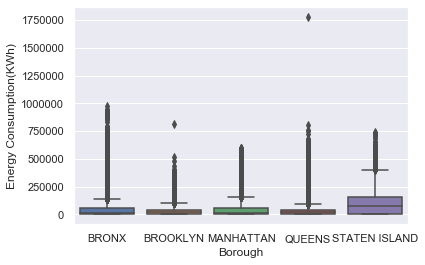

In [331]:
# Checking for outliers in energy consumption and total costs
sns.set(font_scale = 1)
sns.boxplot(ds['Borough'], ds['Energy Consumption(KWh)'])

In [332]:
# Removing outliers from energy and costs columns
ds = ds.drop(ds[ds['Energy Consumption(KWh)'] > 500000].index)
ds = ds.drop(ds[ds['Total Costs($)'] > 75000.00].index)
ds = ds.drop(ds[(ds['Bill Date'] == '2019-01') |
                (ds['Bill Date'] == '2019-02') |
                (ds['Bill Date'] == '2019-03') |
                (ds['Bill Date'] == '2019-04') |
                (ds['Bill Date'] == '2019-05') |
                (ds['Bill Date'] == '2019-06') |
                (ds['Bill Date'] == '2019-08') |
                (ds['Bill Date'] == '2019-09')].index)

In [309]:
ds.pivot_table(index=['Borough'], 
               values= ['Energy Consumption(KWh)', 'Total Costs($)'],
               aggfunc = {'Energy Consumption(KWh)': np.sum,
                         'Total Costs($)': np.sum})

,Energy Consumption(KWh),Total Costs($)
Borough,,
BRONX,2145997151,2.930450e+08
BROOKLYN,2779053423,3.718460e+08
MANHATTAN,2503894671,3.466276e+08
QUEENS,763006723,1.078849e+08
STATEN ISLAND,209565568,2.830788e+07


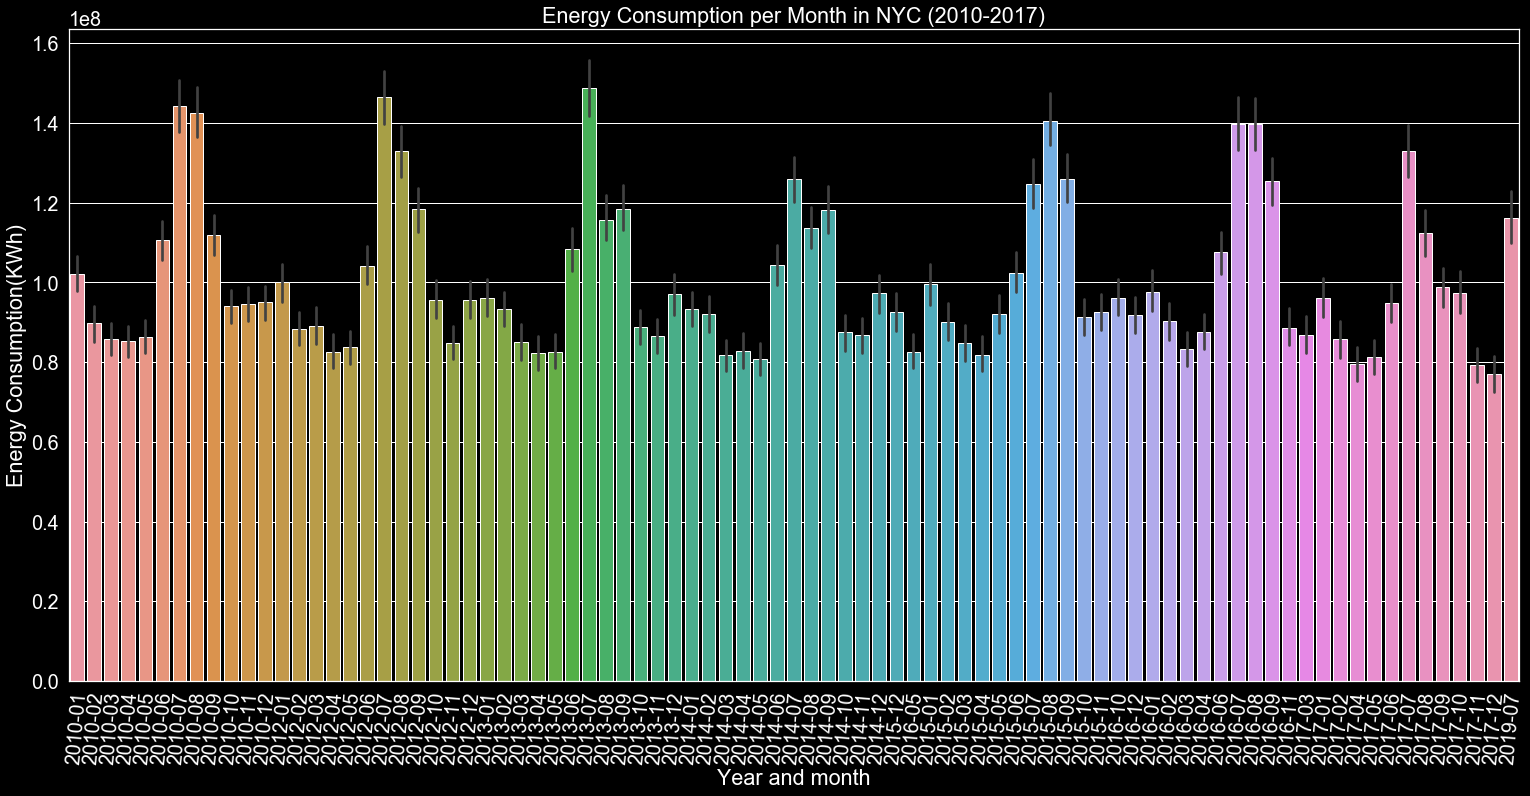

In [352]:
sns.set(font_scale = 1.8)
plt.style.use('dark_background')
plt.figure(figsize=(26,12))

sns.barplot(x='Bill Date', y='Energy Consumption(KWh)', 
            estimator = np.sum,
            data=ds)

ax = plt.xticks(rotation=85)
plt.title('Energy Consumption per Month in NYC (2010-2017)')
plt.xlabel('Year and month')
plt.ylabel('Energy Consumption(KWh)')

plt.savefig('energy.yearournd.png', bbox_inches = 'tight', transparent = True)

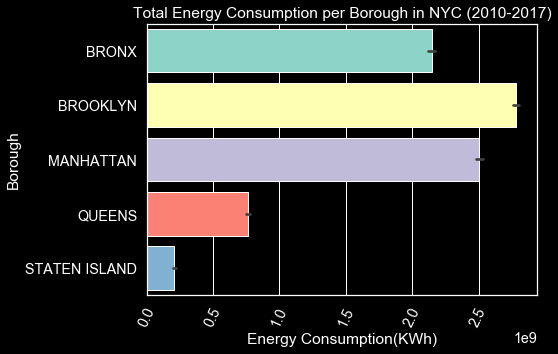

In [319]:
sns.set(font_scale = 1.3)
plt.style.use('dark_background')
plt.figure(figsize=(7,5))
plt.title('Total Energy Consumption per Borough in NYC (2010-2017)')

sns.barplot(x='Energy Consumption(KWh)', y='Borough', estimator = np.sum, data=ds, 
            orient='h', saturation=2.5)

ax = plt.xticks(rotation=65)

plt.savefig('energy.perborough.png', bbox_inches = 'tight', transparent = True)

In [52]:
# Checking Removing last month from dataset beacause it has a peak
ds.pivot_table(index=['Bill Date'], 
               values= ['Energy Consumption(KWh)', 'Total Costs($)'])

,Energy Consumption(KWh),Total Costs($)
Bill Date,,
2010-01,44150.889706,5395.328391
2010-02,37828.585263,4684.196989
2010-03,35915.041021,4666.750540
2010-04,35592.874269,4977.514553
2010-05,35923.316271,5089.231935
...,...,...
2017-08,34775.164138,4880.000598
2017-09,30648.927662,4918.561111
2017-10,30951.007626,3911.695675


In [321]:
# Grouping energy consumption values by year
def getyear(s):
  return s.split("-")[0]

In [322]:
ds['Year']= ds['Bill Date'].apply(lambda x: getyear(x))
ds.head()

,Borough,Account Name,Meter Type,Funding Source,Bill Date,# days,Meter Number,Total Costs($),Rate Class,Bill Analyzed,Energy Consumption(KWh),Power Consumption(KW),Year
0,BRONX,ADAMS,NONE,FEDERAL,2010-01,33,7223256,15396.82,GOV/NYC/068,Yes,128800,216.0,2010
1,BRONX,ADAMS,NONE,FEDERAL,2010-02,30,7223256,14556.34,GOV/NYC/068,Yes,115200,224.0,2010
2,BRONX,ADAMS,NONE,FEDERAL,2010-03,29,7223256,13904.98,GOV/NYC/068,Yes,103200,216.0,2010
3,BRONX,ADAMS,NONE,FEDERAL,2010-04,31,7223256,14764.04,GOV/NYC/068,Yes,105600,208.0,2010
4,BRONX,ADAMS,NONE,FEDERAL,2010-05,28,7223256,13729.54,GOV/NYC/068,Yes,97600,216.0,2010


In [323]:
ds.pivot_table(index=['Year'], 
               values= ['Energy Consumption(KWh)', 'Total Costs($)'],
              aggfunc={'Energy Consumption(KWh)': [max, 'mean', np.sum]})

Energy Consumption(KWh)                            
                         max          mean           sum
Year                                                    
2010                495200.0  42911.360213  1.242026e+09
2012                500000.0  35201.116844  1.221936e+09
2013                500000.0  31684.565282  1.203190e+09
2014                495200.0  29636.208263  1.164170e+09
2015                495200.0  30228.266759  1.218381e+09
2016                499200.0  30306.446440  1.230139e+09
2017                498400.0  29298.828780  1.121676e+09

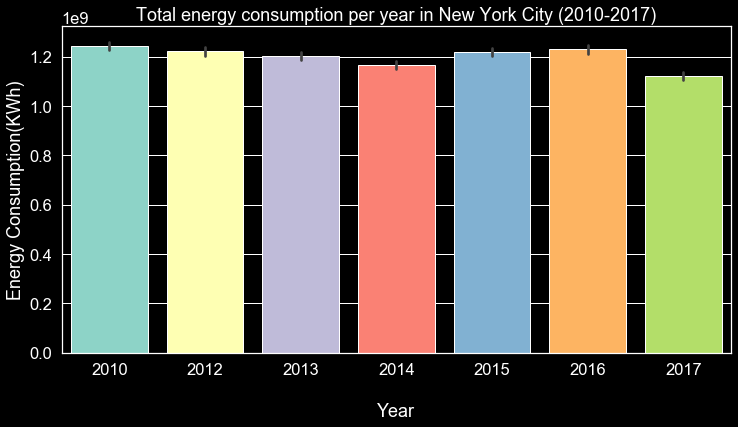

In [327]:
# Final plot of total energy consumption in each month for the last 8 years
sns.set(font_scale = 1.5)
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))

ax = sns.barplot(x='Year', y='Energy Consumption(KWh)', 
                 data=ds, 
                 estimator=np.sum,
                 saturation=1.5)

ax = plt.xticks(rotation=0)
plt.title("Total energy consumption per year in New York City (2010-2017)")
plt.xlabel('\nYear')
plt.ylabel('Energy Consumption(KWh)')

plt.savefig('energy_peryear.png', bbox_inches = 'tight', transparent = True)

# Statistical Analysis

In [335]:
import scipy
from scipy import stats
from scipy.stats import chisquare

In [336]:
ds.describe()

,# days,Total Costs($),Energy Consumption(KWh),Power Consumption(KW)
count,263213.000000,263213.000000,263213.000000,263213.000000
mean,30.388769,4420.168131,32360.697367,65.573561
std,1.546134,5729.238712,46514.256179,113.616968
min,1.000000,-243.150000,0.000000,0.000000
25%,29.000000,380.580000,0.000000,0.000000
50%,30.000000,2820.140000,17440.000000,30.060000
75%,32.000000,6083.040000,48900.000000,96.800000
max,123.000000,74873.670000,500000.000000,16135.460000


In [337]:
mu = ds['Energy Consumption(KWh)'].mean()
mu

32360.697366771397

In [338]:
sigma = ds['Energy Consumption(KWh)'].std()
sigma

46514.25617896979

# Chi square test

In [339]:
ds_2015 = ds[ds['Bill Date'] == '2015-07']['Energy Consumption(KWh)']
ds_no_zeros_2015 = ds_2015[ds_2015 > 0]
len(ds_no_zeros_2015)
ds_no_zeros_2015.mean()

58287.809724170176

In [340]:
ds_2017 = ds[ds['Bill Date'] == '2017-07']['Energy Consumption(KWh)']
ds_no_zeros_2017 = ds_2017[ds_2017 > 0]
len(ds_no_zeros_2017)
ds_no_zeros_2017.mean()

64592.36491739553

In [341]:
ds_2019 = ds[ds['Bill Date'] == '2017-09']['Energy Consumption(KWh)']
ds_no_zeros_2019 = ds_2019[ds_2019 > 0]
len(ds_no_zeros_2019)
ds_no_zeros_2019.mean()

48132.71379814725

In [356]:
observed_values = scipy.array(ds_no_zeros_2015.sample(n = 500, random_state=1))
expected_values = scipy.array(ds_no_zeros_2019.sample(n = 500, random_state=1))


In [345]:
stats.chisquare(observed_values, f_exp=expected_values)

Power_divergenceResult(statistic=819112226.5099442, pvalue=0.0)

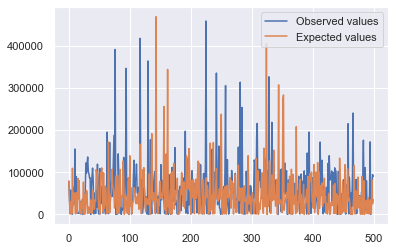

In [346]:
plt.plot(observed_values, label = 'Observed values')
plt.plot(expected_values, label = 'Expected values')
plt.legend()
plt.show()

# Two Samples t-student test


In [360]:
# 2015 Sample
ds_2015 = ds[ds['Bill Date'] == '2015-07']['Energy Consumption(KWh)']
ds_no_zeros_2015 = ds_2015[ds_2015 > 0]
ds_no_zeros_2015.mean()

58287.809724170176

In [361]:
# 2017 Sample
ds_2017 = ds[ds['Bill Date'] == '2017-07']['Energy Consumption(KWh)']
ds_no_zeros_2017 = ds_2017[ds_2017 > 0]
ds_no_zeros_2017.mean()

64592.36491739553

In [362]:
# 2019 sample
ds_2019 = ds[ds['Bill Date'] == '2017-09']['Energy Consumption(KWh)']
ds_no_zeros_2019 = ds_2019[ds_2019 > 0]
len(ds_no_zeros_2019)
ds_no_zeros_2019.mean()

48132.71379814725

In [364]:
observed_values = scipy.array(ds_no_zeros_2015.sample(n = 500, random_state=1))
expected_values = scipy.array(ds_no_zeros_2017.sample(n = 500, random_state=1))

In [365]:
# t test between 2015 and 2017
sample_2015 = np.array(ds_no_zeros_2015.sample(n = 500, random_state=156))
sample_2017 = np.array(ds_no_zeros_2017.sample(n = 500, random_state=156))

t_stats, p_value = stats.ttest_ind(sample_2015, sample_2017, equal_var=False)
print('t statitics =', t_stats, '\np-value =', p_value)

t statitics = -1.097699431291667 
p-value = 0.2726039122943011


In [ ]:
# CONCLUSION: the P value is higher than 0.05 (95% interval) and I can not reject the 
# H0 hypothesis (the means are equal)

In [366]:
# t test between 2015 and 2019
sample_2015 = np.array(ds_no_zeros_2015.sample(n = 500, random_state=156))
sample_2019 = np.array(ds_no_zeros_2019.sample(n = 500, random_state=156))

t_stats, p_value = stats.ttest_ind(sample_2015, sample_2019, equal_var=False)
print('t statitics =', t_stats, '\np-value =', p_value)

t statitics = 3.8227858345722914 
p-value = 0.00014029500393877986


In [28]:
# CONCLUSION: the P value is lower than 0.05 (95% interval) then you can reject the 
# H0 hypothesis and accept H1 (the means are different)